### 개발환경
- Anaconda3-2021.05 (python_3.8.8)
- NVIDIA GeForce GTX 960M (드라이버 471.11)
- cuda_11.2.2
- cudnn_8.1.1
- tensorflow-2.5.0 (pip install tensorflow)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.5.0'

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18023623463159652634,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1418189211
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5928707775730678999
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

### 이미지 테스트

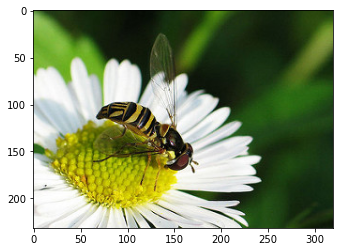

In [5]:
image = plt.imread('C:/Users/user/.keras/datasets/flower_photos/daisy/5547758_eea9edfd54_n.jpg')
plt.imshow(image)

In [6]:
image.shape, image.max(), image.min()

((232, 320, 3), 255, 0)

### 이미지 폴더 로딩
- tensorflow.keras.preprocessing.image.ImageDataGenerator
- tensorflow.keras.preprocessing.image.DirectoryIterator

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/user/.keras/datasets/flower_photos',
    target_size=(200,200),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='categorical') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 3670 images belonging to 5 classes.


### 배치 이미지 확인

In [18]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    #print(labels_batch)
    break

0 (20, 200, 200, 3) (20, 5)


In [20]:
labels_batch.argmax(axis=1)

array([0, 3, 4, 2, 2, 4, 1, 0, 4, 4, 0, 0, 0, 4, 0, 1, 1, 1, 4, 1],
      dtype=int64)

(200, 200, 3) 1.0 0.0


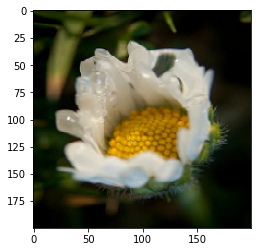

In [21]:
img = data_batch[0]
plt.imshow(img)
print(img.shape, img.max(), img.min())

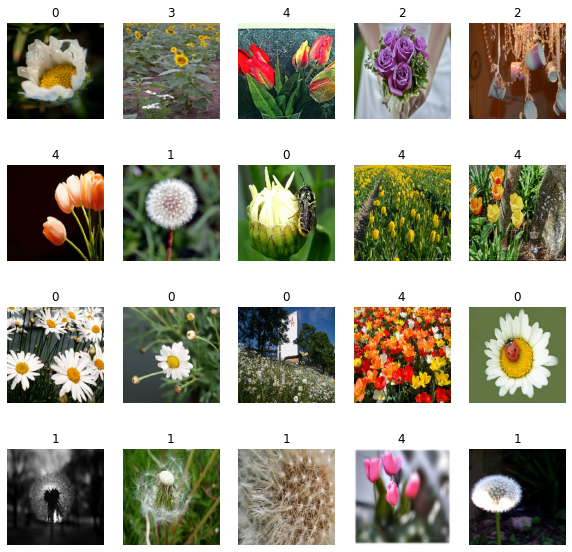

In [22]:
plt.figure(figsize=[10,10])
labels = labels_batch.argmax(axis=1)

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')
    plt.title(labels[i])

### CNN 적용

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(200,200,3),
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)            

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [31]:
history = model.fit_generator(train_generator, epochs=20, steps_per_epoch=183)

Epoch 1/20
183/183 [==============================] - 21s 110ms/step - loss: 1.2711 - acc: 0.4770
Epoch 2/20
183/183 [==============================] - 20s 110ms/step - loss: 0.9455 - acc: 0.6356
Epoch 3/20
183/183 [==============================] - 20s 110ms/step - loss: 0.7160 - acc: 0.7310
Epoch 4/20
183/183 [==============================] - 20s 110ms/step - loss: 0.4774 - acc: 0.8318
Epoch 5/20
183/183 [==============================] - 20s 111ms/step - loss: 0.2538 - acc: 0.9112
Epoch 6/20
183/183 [==============================] - 20s 110ms/step - loss: 0.1611 - acc: 0.9485
Epoch 7/20
183/183 [==============================] - 20s 111ms/step - loss: 0.1012 - acc: 0.9701
Epoch 8/20
183/183 [==============================] - 20s 111ms/step - loss: 0.0459 - acc: 0.9849
Epoch 9/20
183/183 [==============================] - 20s 111ms/step - loss: 0.0618 - acc: 0.9827
Epoch 10/20
183/183 [==============================] - 20s 111ms/step - loss: 0.0408 - acc: 0.9871
Epoch 11/20
183/183

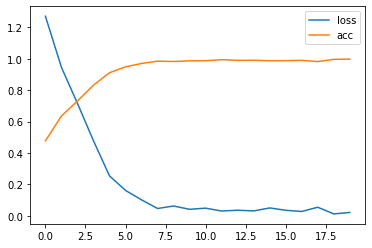

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['loss', 'acc'])

### 전이학습

In [33]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [35]:
base_model = InceptionV3(weights='imagenet', include_top=False,
                        input_shape=(299,299,3))

In [36]:
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

d:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [39]:
train_datagen = ImageDataGenerator(rescale=1/255.)
# train_datagen = ImageDataGenerator(rescale=1/255.,
#    preprocessing_function=lambda x: (x-0.5)*2.)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/user/.keras/datasets/flower_photos',
    target_size=(299,299),
    batch_size=20,
    class_mode='categorical') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 3670 images belonging to 5 classes.


In [40]:
history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=183)

Epoch 1/10
183/183 [==============================] - 68s 342ms/step - loss: 1.2026 - acc: 0.5753
Epoch 2/10
183/183 [==============================] - 62s 336ms/step - loss: 0.7244 - acc: 0.7855
Epoch 3/10
183/183 [==============================] - 62s 341ms/step - loss: 0.5704 - acc: 0.8282
Epoch 4/10
183/183 [==============================] - 63s 344ms/step - loss: 0.4880 - acc: 0.8488
Epoch 5/10
183/183 [==============================] - 63s 344ms/step - loss: 0.4385 - acc: 0.8641
Epoch 6/10
183/183 [==============================] - 63s 343ms/step - loss: 0.4037 - acc: 0.8814
Epoch 7/10
183/183 [==============================] - 63s 346ms/step - loss: 0.3729 - acc: 0.8863
Epoch 8/10
183/183 [==============================] - 63s 345ms/step - loss: 0.3522 - acc: 0.8923
Epoch 9/10
183/183 [==============================] - 62s 340ms/step - loss: 0.3361 - acc: 0.8962
Epoch 10/10
183/183 [==============================] - 65s 352ms/step - loss: 0.3202 - acc: 0.8986


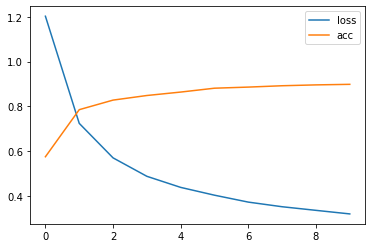

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['loss', 'acc'])